In [209]:
import numpy as np
import pandas as pd

## Load Data

In [210]:
data = ['five-mer.csv', 'six-mer.csv', 'seven-mer.csv', 'ordinal_encoding.csv', 'subseq_natural_vector.csv', 'natural_vector_cov.csv', 'vec_dna_w2v.csv', 'vec_dna_tfidf_w2v.csv']

########## EDIT HERE TO CHANGE DATASET ##########
dat_idx = 6 # index to choose the dataset, [0,7]
#################################################

file_path = "../data/" + data[dat_idx]
dat_name = data[dat_idx][:-4] 
df = pd.read_csv(file_path, header=None)

#label = '../data/label_1.txt'
label = '../data/label.txt'
y = np.loadtxt(label, dtype='str')

In [211]:
num_classes = len(np.unique(y))
num_classes

28

In [212]:
num_samples = len(df.index)
print("Number of Samples: ", num_samples)

num_features = len(df.columns)
print("Number of Features: ", num_features)

Number of Samples:  15018
Number of Features:  100


In [213]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## Train-Test Split

In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42, stratify=y)
test_indices = pd.DataFrame(X_test.index, columns=['test index'])
test_indices.to_csv('../feature_selection/test_indices.csv', index=False)

In [215]:
num_training_samples = len(y_train)
print("Number of Training Samples: ", num_training_samples)

Number of Training Samples:  12014


## PCA

In [216]:
from sklearn.decomposition import PCA

# n_components = 2313

# pca = PCA(n_components=n_components)
# pca_features = pca.fit_transform(df)
# explained_variance_ratio = sum(pca.explained_variance_ratio_[:n_components])

In [217]:
lower_bound = round(num_features/10)
#print(lower_bound)
upper_bound = round(num_features/2)

explained_variances = [] # for the plot
n_components = [] # for the plot

for i in range (lower_bound,upper_bound, 2):
    #print(str(i))
    pca = PCA(n_components=i)
    pca_features = pca.fit_transform(X_train)
    explained_variance_ratio = sum(pca.explained_variance_ratio_[:i])
    explained_variances.append(explained_variance_ratio)
    n_components.append(i)
    print(str(i) + " components")

    print(explained_variance_ratio)

    if (round(explained_variance_ratio,2) >= 0.90):
        break

10 components
0.8575150089954087
12 components
0.8783295469820129
14 components
0.8964272330987639


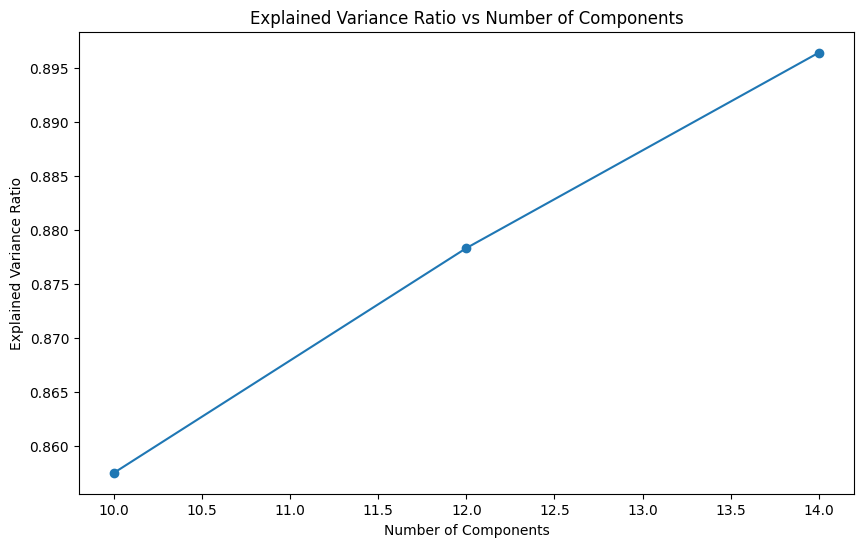

In [218]:
import matplotlib.pyplot as plt

# Plotting the curve
plt.figure(figsize=(10, 6))
plt.plot(n_components, explained_variances, marker='o')
plt.title("Explained Variance Ratio vs Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
#plt.grid(True)
plt.show()

In [219]:
num_selected_features = len(pca_features[0])
print("Number of Selected Features: ", num_selected_features)

Number of Selected Features:  14


In [220]:
print("PCA Explained Variance Ratio: ", explained_variance_ratio)

PCA Explained Variance Ratio:  0.8964272330987639


In [221]:
pca_transformed = pd.DataFrame(pca.transform(df))

In [222]:
save_df_name = '../feature_selection/PCA/' + 'pca_' + dat_name 
pca_transformed.to_csv(save_df_name + '.csv', index=False, header=False)

In [223]:
save_txt_name = '../feature_selection/PCA/' + 'pca_' + dat_name
with open(save_txt_name + '.txt', 'w') as f:
    f.write(dat_name + ' Number of Selected Features After PCA: ' + str(num_selected_features) + "\n")
    f.write(dat_name + ' PCA Cumulative Explained Variance Ratio: ' + str(explained_variance_ratio) )

## LR-LASSO

In [224]:
# from sklearn.linear_model import LogisticRegressionCV

# # Logistic Regression with L1 regularization for feature selection
# log_reg = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear').fit(X_train, y_train)

# # Mask for selecting features
# lasso_mask = log_reg.coef_.sum(axis=0) != 0
# selected_features_lasso = df.columns[lasso_mask]

# save_df_name = '../feature_selection/LASSO/' + 'lasso_' + dat_name


In [225]:
# df[selected_features_lasso].to_csv(save_df_name + '.csv', index=False, header=False)

In [226]:
# save_txt_name = '../feature_selection/LASSO/' + 'lasso_' + dat_name
# with open(save_txt_name + '.txt', 'w') as f:
#     f.write(dat_name + ' Number of Selected Features After LR-LASSO: ' + str(len(selected_features_lasso)))

## 1-D CNN

In [227]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class FS_1DCNN(nn.Module):
#     def __init__(self, output_size=640):
#         super(FS_1DCNN, self).__init__()
#         self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=3)
#         self.pool1 = nn.MaxPool1d(2, stride=3)
#         self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=3)
#         self.pool2 = nn.MaxPool1d(2, stride=3)
#         self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=2)
#         self.pool3 = nn.MaxPool1d(2, stride=2)
#         self.fc1 = nn.Linear(output_size, 100)
#         self.fc2 = nn.Linear(100, num_classes)  

#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         x = self.pool1(x)  # Use the defined pooling layer
#         x = F.relu(self.conv2(x))
#         x = self.pool2(x)  # Use the defined pooling layer
#         x = F.relu(self.conv3(x))
#         x = self.pool3(x)  # Use the defined pooling layer

#         # Flatten the output for the fully connected layer
#         x = x.view(x.size(0), -1)

#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x


In [228]:
# X_train_np = np.array(X_train)
# X_reshaped = X_train_np.reshape(X_train_np.shape[0], 1, X_train_np.shape[1]) #(num_samples, 1, num_features)

# # Convert to pytorch tensor
# X_tensor = torch.tensor(X_reshaped, dtype=torch.float32)
# y_tensor = torch.tensor(y_train, dtype=torch.long)

In [229]:
# dummy_input = torch.randn(1, 1, num_features)
# model = FS_1DCNN()

# with torch.no_grad():
#     dummy_output = dummy_input
#     for layer in [model.conv1, model.pool1, model.conv2,model.pool2, model.conv3, model.pool3]:  # include all conv and pooling layers
#         dummy_output = layer(dummy_output)

#     dummy_output = dummy_output.view(dummy_output.size(0), -1)

# output_size = dummy_output.shape[1]
# print("Number of CNN selected features: ", output_size)

In [230]:
# save_txt_name = '../feature_selection/1D-CNN/' + '1dcnn_' + dat_name
# with open(save_txt_name + '.txt', 'w') as f:
#     f.write(dat_name + ' Number of Selected Features After 1D-CNN: ' + str(output_size))

In [231]:
# model = FS_1DCNN(output_size=output_size)

# # loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # training
# num_epochs = 100  
# for epoch in range(num_epochs):
#     # fp
#     outputs = model(X_tensor)
#     loss = criterion(outputs, y_tensor)

#     # bp
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     if (epoch+1) % 1 == 0:
#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [232]:
# def extract_features(data, model):
#     model.eval()  # Set the model to evaluation mode
#     with torch.no_grad():
#         features = model.conv1(data)
#         features = model.pool1(features)
#         features = model.conv2(features)
#         features = model.pool2(features)  
#         features = model.conv3(features)
#         features = model.pool3(features)
#         features = features.view(features.size(0), -1)  # flatten
#     return features

# X_all = np.array(df)
# X_all_reshaped = X_all.reshape(X_all.shape[0], 1, X_all.shape[1])
# X_all_tensor = torch.tensor(X_all_reshaped, dtype=torch.float32)
# extracted_features = extract_features(X_all_tensor, model)

In [233]:
# extracted_features_np = extracted_features.numpy()
# cnn_selected_features_df = pd.DataFrame(extracted_features_np)

In [234]:
# save_df_name = '../feature_selection/1D-CNN/' + '1dcnn_' + dat_name
# cnn_selected_features_df.to_csv(save_df_name + '.csv', index=False, header=False)